# Selected Atricle's Name :"Application of Wavelet Transform in Analysis of Cough Sound Records"



The selected article delves into the analysis of a cough signal, which is characterized by its rapid temporal changes, rendering Fourier transform analysis inadequate for capturing all pertinent information. Thus, the article employs Continuous Wavelet Transform (CWT), which offers insights into signal representation across both time and frequency domains concurrently. Within the article, CWT is applied to a segment of a cough sound recording, utilizing time-shifted mother wavelets across various scales.

For this project, our task was to implement the methodologies described in the article. We have successfully integrated CWT transformations for the mother wavelets presented in the article : Mexican Hat, Haar, and Morlet as the main wavelet.

To verify our  algorithm, we first used a reference analog signal=cos(2π(50+10t)t) + sin(2π*25t) .
In line with the article's depiction, we will plot the scalogram as time vs scale.







After reciving the expected results in the reference signal, we applied cough signal to our algorithm, following the methodology outlined in the referenced article. Our aim was to faithfully replicate their approach in presenting the signal through Continuous Wavelet Transform (CWT) transformations.
In line with the article, we utilized the wavelet mother function across multiple scales for signal analysis. We employed four different resolutions for the transformation: 1:16, 1:31, 1:61, and 1:128, each providing distinct levels of detail in both time and frequency representation.

Why did the researchers present the result in time vs scale and not time vs frequency?

The Wavelet Transformation (WT) operates on the Multiresolution Analysis (MRA) principle, where its outcomes are contingent upon the scale variation. MRA posits that at higher resolutions, temporal position determination is more precise than frequency determination. Conversely, at lower resolutions, frequency values are more accurately discerned than temporal position.

Therefore, the researchers use four types of resolutions for the
transformation. When analyzing with different resolutions, it
was confirmed that the most accurate determination of
position in time can be observed at the smallest selected
frequency resolution of 1:16 and the best frequency resolution
at the most significant desired resolution of 1:128.



## Part 1- Reference Signal


Initially, we defined the wavelet functions utilized in the article: Morlet, Haar, and Mexican Hat. The first parameter, t (time), denotes the shifting of the mother wavelet in time, while the second parameter, scale, represents the width of the mother wavelet.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def morlet_wavelet(t, scale):
    # Morlet wavelet function
    return np.exp(2j * np.pi * (t) / scale) * np.exp(-(t)**2 / (2 * scale**2))

def haar_wavelet(t):
    # Haar wavelet function
    return np.where((0 <= t) & (t < 0.5), 1, np.where((0.5 <= t) & (t < 1), -1, 0))

def mexican_hat_wavelet(t, scale):
    # Mexican hat wavelet function
    m=t/scale
    return (2 / (np.sqrt( 3*scale) * np.pi**0.25)) * (1 - (m**2)) * np.exp(-0.5 * m**2)

This function plots the original signal, the wavelet, and their correlation at a specific time and scal on a given axis.

By visualizing the correlation between the signal and the wavelet at different scales and time points, one can understand how different features in the signal are captured by the wavelet.

In [ ]:
def plot_Signal(t,signal,wavelet,scale,transformed_signal,j,ax):
    score =transformed_signal.round(1)
    scale = scale.round(1)
    ax.plot(t,signal)
    ax.plot(t,wavelet.real)
    ax.plot(t,signal*wavelet.real,'m:')  #correlation between the signal and the wavelet
    ax.legend(['signal','wavelet','Correlation'])
    # ax.set_xlabel('time')
    ax.set_ylabel('Amplitude')
    ax.set_title( f' time = {j},Scale = {scale},Score={score}')

This function performs the wavelet transform on the given signal.
It iterates over different scales and time points to compute the wavelet transform .
At each scale and time point, it convolves the signal with the selected wavelet and computes a score representing the similarity between the signal and the wavelet at that scale and time.

Smaller scales correspond to higher frequencies, and larger scales correspond to lower frequencies.

In [ ]:
def wavelength_transform(signal, widths ,t,dt,Wavelet,plotOn):
    n = len(t)  # Number of points in the signal
    iter=0
    scale = widths *dt
    score = np.zeros((len(scale), n), dtype=float)  #initializes an array score of shape (len(scale), n) filled with zeros to store the scores (transformed signal) obtained from the wavelet transform.
      #nested loop where i iterates over the scales and j iterates over the time points.
    for i, s in enumerate(scale ):  # loop over all scale factors
        for j in range(n):          # loop over all time shift
            # Calculate the wavelet at each time point and scale
            if Wavelet == 'morlet':
                wavelet = morlet_wavelet((t - j*dt), s)
            elif Wavelet == 'haar':
                wavelet = haar_wavelet((t - j*dt) / s)
            elif Wavelet == 'mexican_hat':
                wavelet = mexican_hat_wavelet((t - j*dt),s)
            else:
               raise ValueError("Invalid wavelet type. Choose 'haar' or 'morlet' or 'mexican_hat'.")

            # Convolve the signal with the wavelet at the current time point
            score[i, j] = np.abs((np.sqrt(1/s)*np.sum(signal * wavelet))**2)

   #plot signal and wavelet at spacific scale and time locations (genereate 5 graph),
            scale_iteration = np.array([20,20,20,20,20])
            time_iteration  = np.array([107, 182, 257, 332, 407])
            scale_iteration2 = np.array([21,25,50,75,100])
            time_iteration2  = np.array([250,250,250,250,250])
            if ((plotOn) & (np.isin(i,scale_iteration)) & (np.isin(j,time_iteration))) :
                if iter == 0:
                    fig, ax1 = plt.subplots(nrows=5, ncols=1,figsize=(10, 8))
                    fig, ax2 = plt.subplots(nrows=5, ncols=1,figsize=(10, 8))
                plot_Signal(t,signal,wavelet,s/dt,score[i,j],j,ax1[iter])
                iter +=1
            if ((plotOn) & (np.isin(i,scale_iteration2)) & (np.isin(j,time_iteration2))) :
                iter = 0 if iter ==5 else iter
                plot_Signal(t,signal,wavelet,s/dt,score[i,j],j,ax2[iter])
                iter +=1
    fig.tight_layout(pad=1.0)#arrange subplot

    return score

This function plots 2 scalogram, which is a 2D representation of the wavelet transform results.

In the first plot, the x-axis represents time, the y-axis represents scale, and the color represents the amplitude of the transformed signal.

The second plot is similar to the first but displays the y-axis in terms of frequency instead of raw scale values, utilizing a symmetrical logarithmic scale to handle the nonlinear nature of frequency scaling.





In [ ]:
def plot_scalogram(time,scale,freq,transformed_signal):
    #plot scalogram - time vs scale
    plt.figure()
    transformed_signal_S = np.flip(transformed_signal,0)
    plt.imshow(transformed_signal_S, aspect='auto', extent=[time[0], time[-1], scale[0], scale[-1]],cmap= "jet")
    plt.colorbar(label='Amplitude')
    plt.title('Wavelength Transform')
    plt.xlabel('Time[s]')
    plt.ylabel('Scale')
    plt.show()
    #plot scalogram - time vs frequency
    plt.figure()
    plt.imshow(transformed_signal, aspect='auto',cmap= "jet")
    plt.yscale('symlog', linthresh=min(freq))  # Sets the y-axis scale to a symmetrical logarithmic scale (symlog) with a linear threshold at the minimum frequency (linthresh=min(freq)).
    plt.yticks(scale[::3], freq[::3].astype('int'))  # Set custom ticks and labels as frequancy is non-linear
    plt.colorbar(label='Amplitude')
    plt.title('Wavelength Transform')
    plt.xlabel('Time[s]')
    plt.ylabel('Freq[Hz]')
    plt.show()

This function plots the wavelet transform results in 3D.
It provides a three-dimensional view of how the transformed signal varies across different scales and time points.
The x-axis represents time, the y-axis represents scale, and the z-axis represents the score (transformed signal).


In [ ]:
def plot3D(time, widths, score):
    X, Y = np.meshgrid(time, widths)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, score, cmap='jet')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Scale')
    ax.set_zlabel('Score')
    plt.show()

This is the main function where the wavelet analysis is orchestrated.

It initializes a time array and generates a reference signal with sampling frequency of 499Hz.

The relationship between frequency and scale is determined:

 freq = 1/scale = 1/(widths* dt ) = fs/widths
 , While widths is array of scale values ( 1 to 128) for the wavelet transform.


The code then performs the wavelet transform on the signal using the specified mother wavelet  and plots the resulting scalogram and 3D representation. Finally, it returns the transformed signal scores.






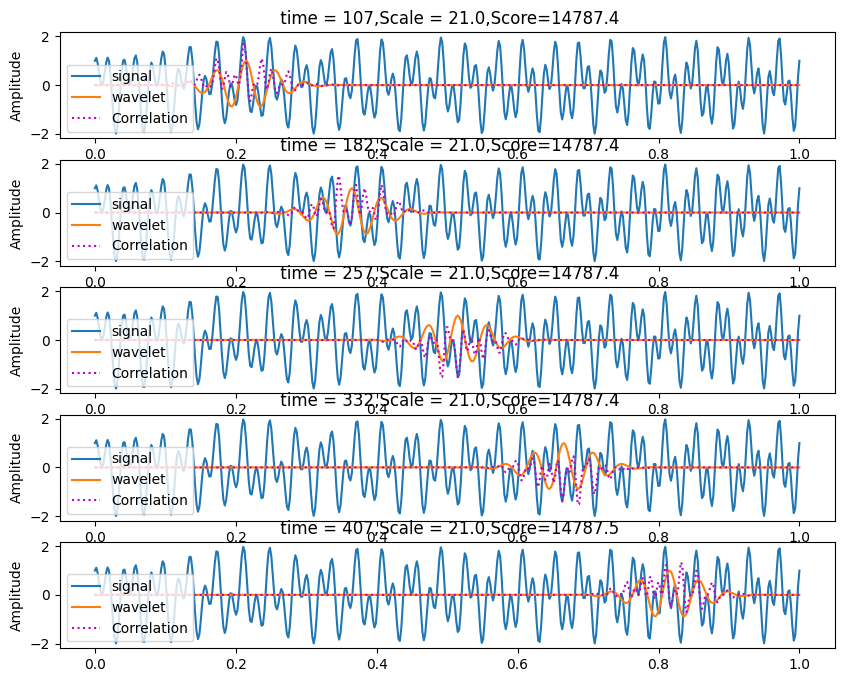

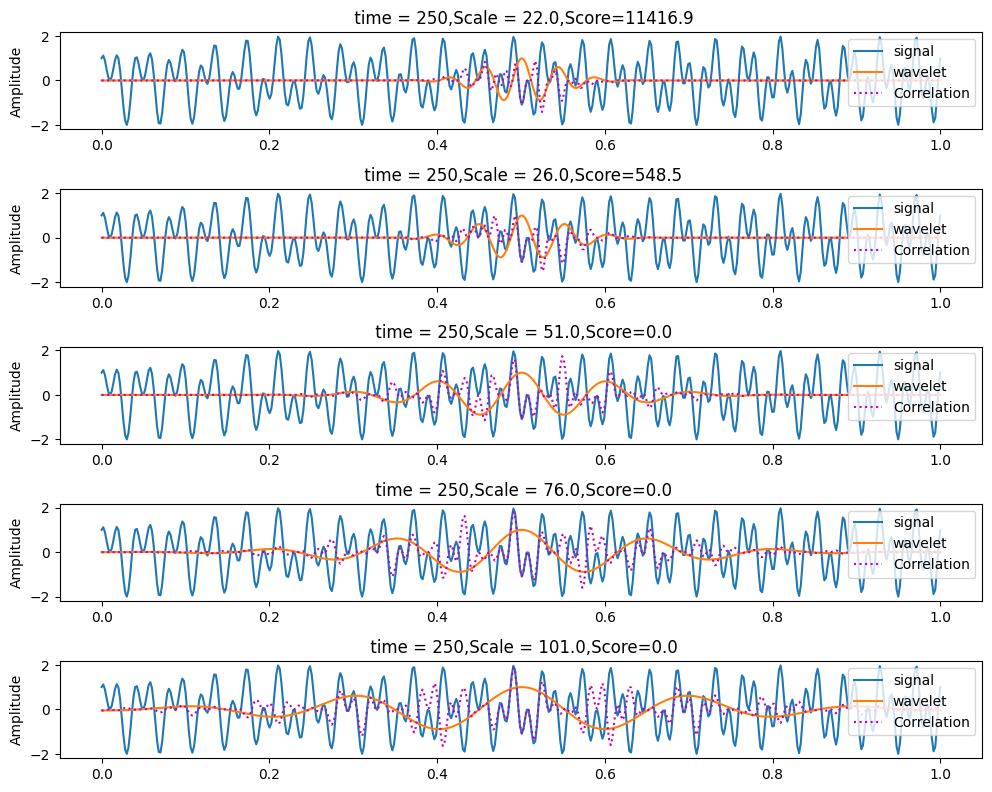

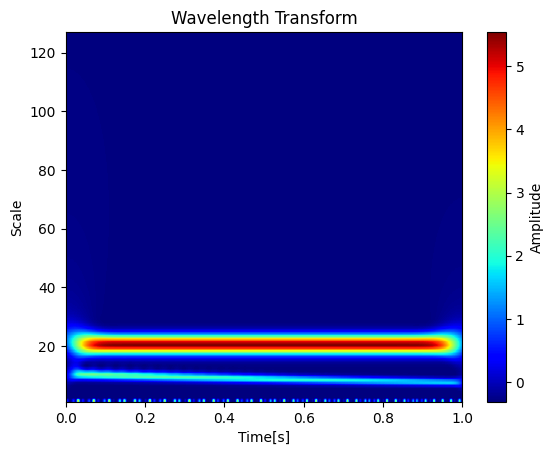

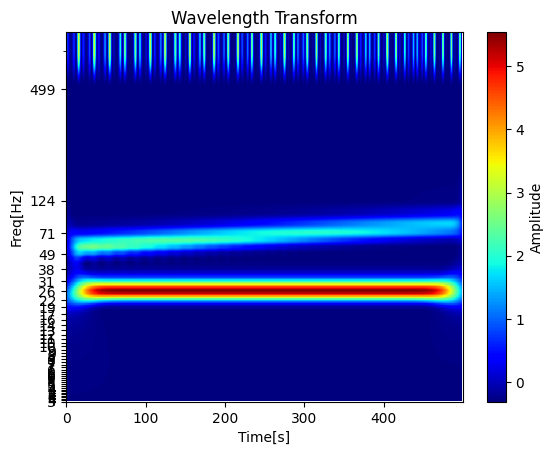

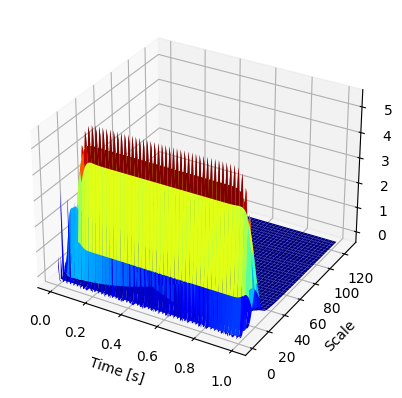

In [ ]:
def main(Wavelet):

    time, dt = np.linspace(0, 1, 500, retstep=True) # #This line generates a time array time, representing time values from 0 to 1 with 500 points evenly spaced. dt timestep difference
    signal = np.cos(2*np.pi*(50 + 10*time)*time) + np.sin(2*25*np.pi*time) #ref signal
    fs = 1/dt  #sampling frequency
    #print(fs)
    maxScale = 128
    widths = np.arange(1,maxScale).astype('float64')   #min frequancy= 1/(maxScale/fs) e.g minFreq(128)=1/(128/12000)=93.75Hz ,minFreq(16)=1/(16/12000)=750Hz
    freq = 1/(widths/fs)    #freq=1/scale= 1/(widths *dt) =1/(widths/fs)      ;scale=widths *dt ; dt=1/fs
    score = wavelength_transform(signal, widths ,time,dt,Wavelet,plotOn=1)
    score =  (score-np.mean(score[:]))/np.std(score[:]) #zscale to score
    plot_scalogram(time,widths,freq,score)
    plot3D(time, widths, score)
    return score

if __name__ == '__main__':

    score = main(Wavelet = 'morlet')#select mother wavelet : 'morlet' or 'haar' or 'mexican_hat'

Analysis of Results:

The generated scalogram aligns with our expectations based on reference signal=cos(2π(50+10t)t) + sin(2π*25t) .


As we defined: freq= 1/ (widths/ fs) ---> Scale= fs/freq

When:
*    freq=25Hz (sine signal frequency), Scale=499/25~ 20.

*    freq=50Hz (cosine signal frequency at t=0), Scale=400/50~ 10, decreasing with time (cosine freq is increasing in time)


This inverse relationship between frequency and scale is further confirmed by plotting the scalogram of time vs frequency and time vs scale.


Additionally, we received two plots: one showing the signal and the Morlet wavelet shifted in time, along with their correlation; and another showing the Morlet wavelet at various scales, also including the correlation between the signal and the wavelet.








Now, after validating our algorithm, we will apply it to the cough signal, as described in the article.

We are using 'readWave' - reads  WAV audio files and return the audio data along with its sampling rate (48KHz for our audio file).
In the article, the researches used one thousand signal samples at a sampling frequency of 11025.
In line with the article, we downsampled as well the signal by 4- from 48KHz to 12KHz.

A wavelet transformation was applied to the selected
sample of the sound of a cough, which yielded coefficients(scores), displayed in scalograms and 3D plot.

For comparison,  three types of mother wavelets were used in the article: a
Morlet wavelet as the main wavelet, a Haar wavelet, and a
Mexican hat.


Plotting Morlet wavelet for all max scales:
This is the results for Morlet wavelet with max scale = 128


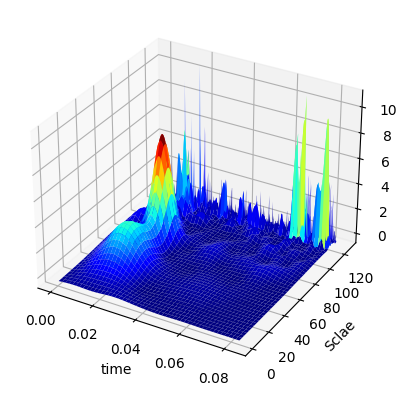

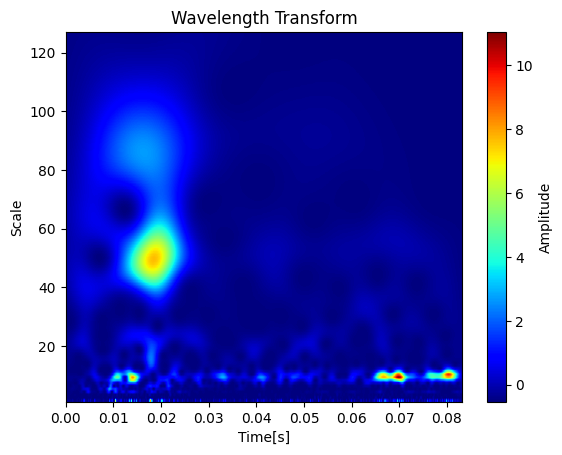

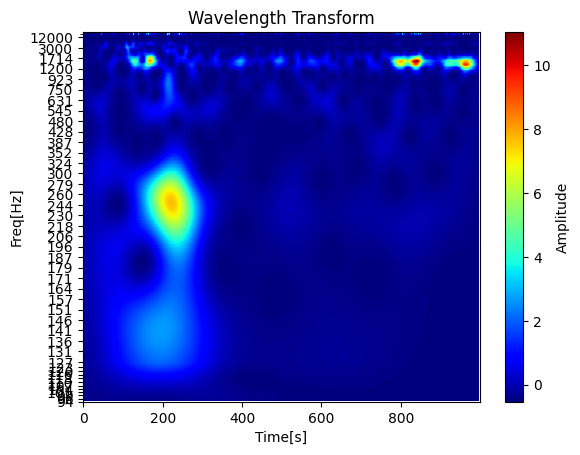

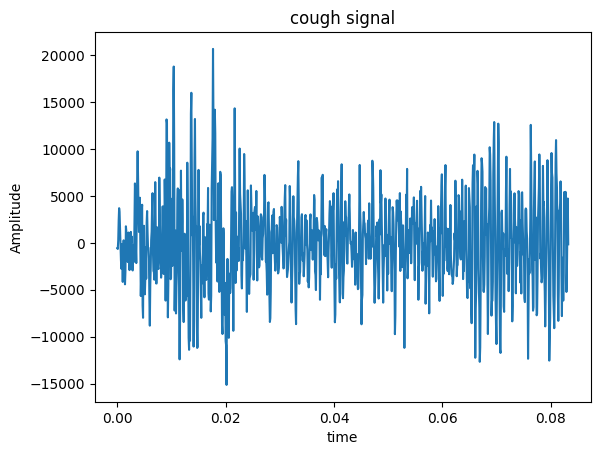

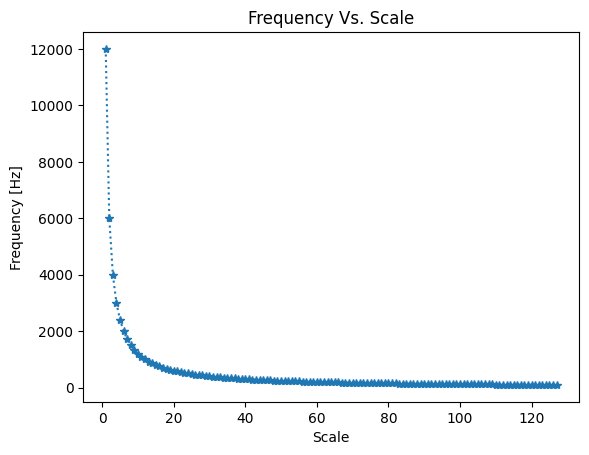

This is the results for Morlet wavelet with max scale = 61


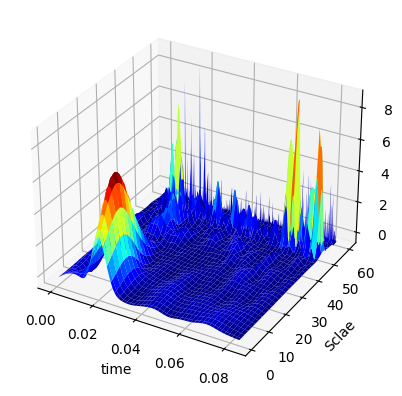

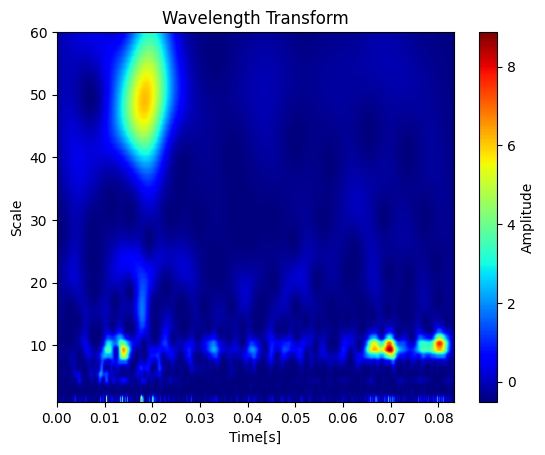

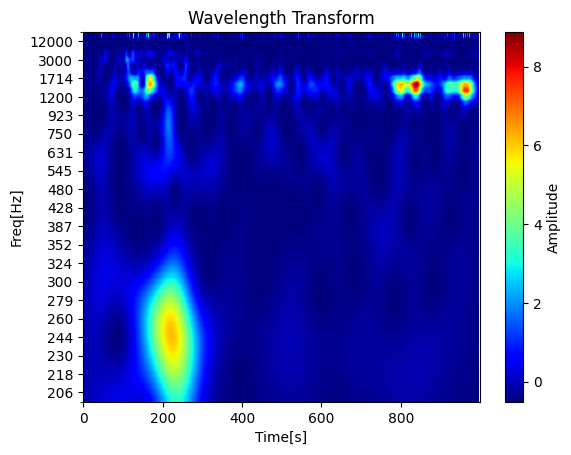

This is the results for Morlet wavelet with max scale = 31


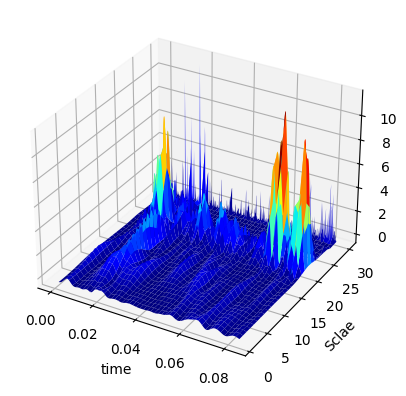

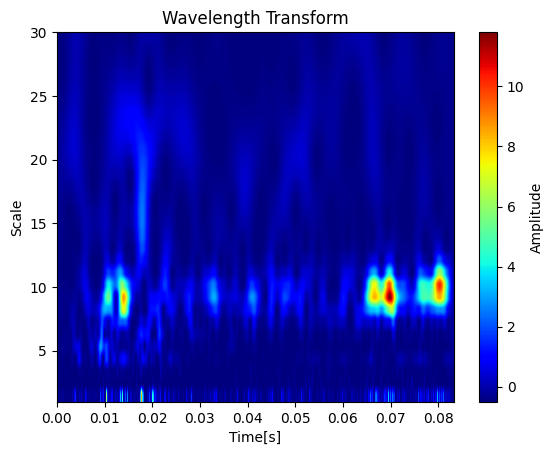

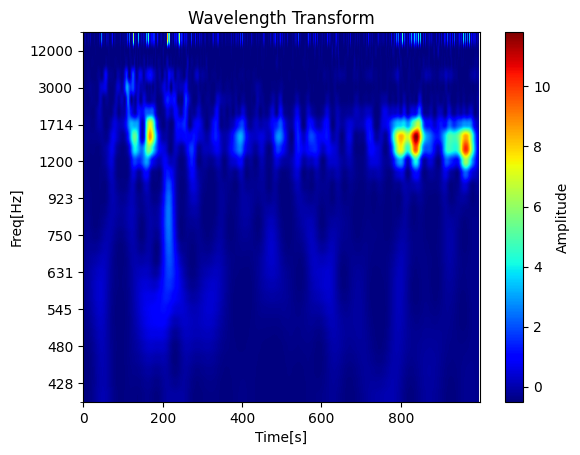

This is the results for Morlet wavelet with max scale = 16


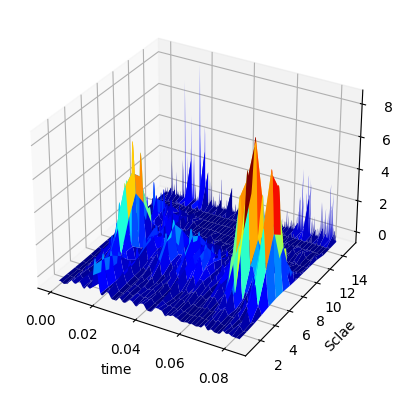

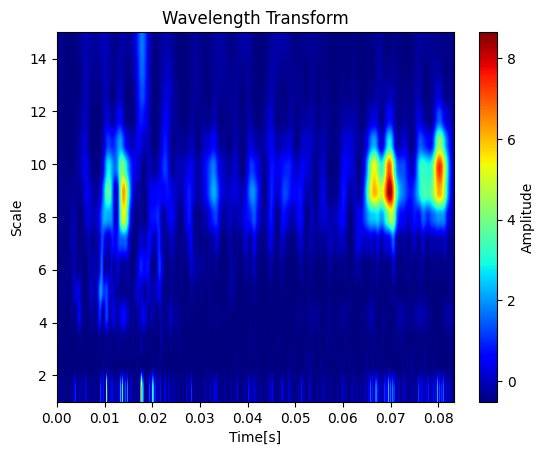

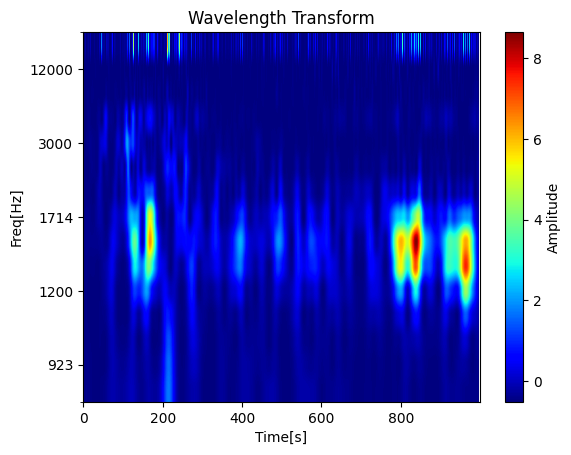


Plotting 'mexican_hat' and 'haar' wavelet for max scale of 128:
This is the results for mexican_hat wavelet with max scale = 128


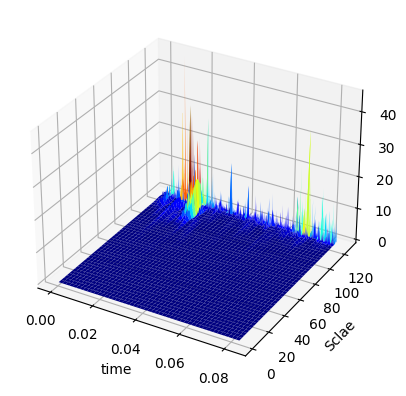

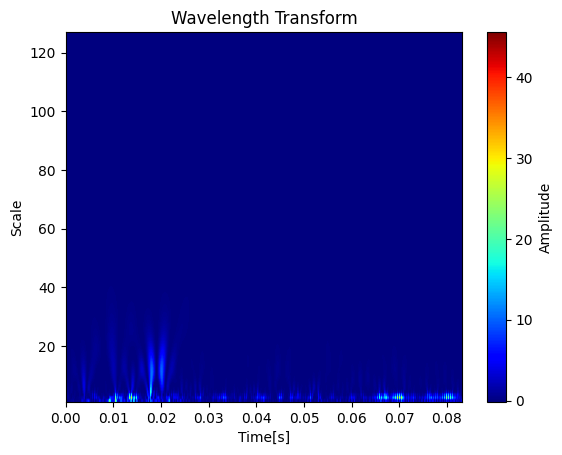

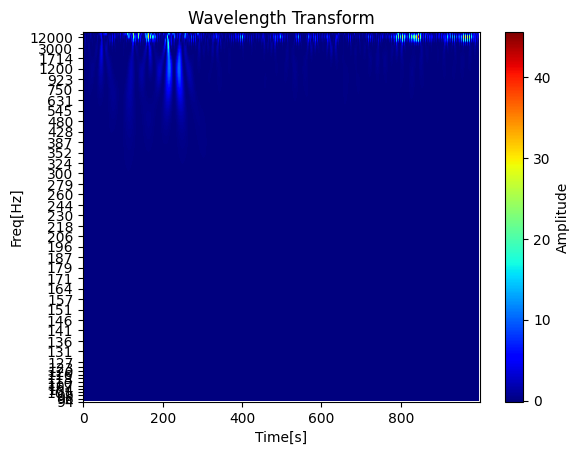

This is the results for haar wavelet with max scale = 128


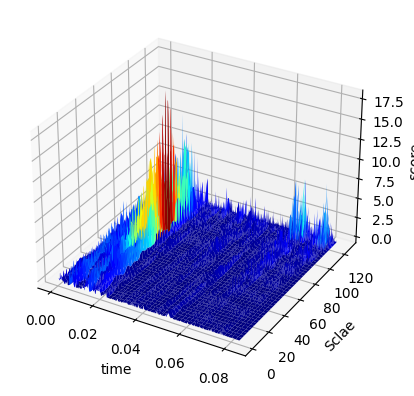

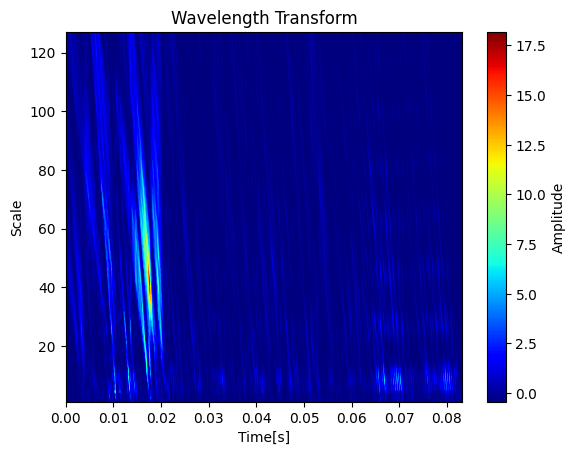

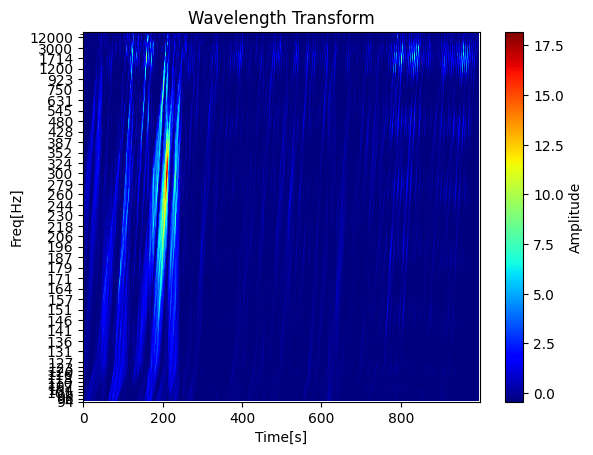

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
file_path = '/content/cough.wav'

def readWave(path) :
    samplerate, data = wavfile.read(file_path)
    data=data[:,0] # convert to mono signal (stereo audio data typically contains two channels )
    return data ,samplerate


def morlet_wavelet(t, scale):
    # Morlet wavelet function
    return np.exp(2j * np.pi * (t) / scale) * np.exp(-(t)**2 / (2 * scale**2))

def haar_wavelet(t):
    # Haar wavelet function
    return np.where((0 <= t) & (t < 0.5), 1, np.where((0.5 <= t) & (t < 1), -1, 0))

def mexican_hat_wavelet(t, scale):
    # Mexican hat wavelet function
    return (2 / (np.sqrt( 3*scale) * np.pi**0.25)) * (1 - (t**2 / scale**2)) * np.exp(-0.5 * ((t / scale)**2))

def plot_Signal(t,signal,wavelet,scale,transformed_signal,j,ax):
    score =transformed_signal.round(1)
    scale = scale.round(1)
    ax.plot(t,signal)
    ax.plot(t,wavelet.real)
    ax.plot(t,signal*wavelet.real,'m:')
    ax.legend(['signal','wavelet','Correlation'])
    # ax.set_xlabel('time')
    ax.set_ylabel('Amplitude')
    ax.set_title( f' time = {j},Scale = {scale},Score={score}')

def wavelength_transform(signal, widths ,t,dt,Wavelet,plotOn):
    # Number of points in the signal
    n = len(t)

    scale = widths *dt
    score = np.zeros((len(scale), n), dtype=float)

    for i, s in enumerate(scale ):  # loop over all scale factors
        for j in range(n):          # loop over all time shift
            # Calculate the wavelet at each time point and scale
            if Wavelet == 'morlet':
                wavelet = morlet_wavelet((t - j*dt), s)
            elif Wavelet == 'haar':
                wavelet = haar_wavelet((t - j*dt) / s)
            elif Wavelet == 'mexican_hat':
                wavelet = mexican_hat_wavelet((t - j*dt),s)
            else:
               raise ValueError("Invalid wavelet type. Choose 'haar' or 'morlet' or 'mexican_hat'.")

            # Convolve the signal with the wavelet at the current time point
            score[i, j] = np.abs((np.sqrt(1/s)*np.sum(signal * wavelet))**2)

    return score
def plot_scalogram(time,scale,freq,transformed_signal):
    #plot scalogram that show the signal change in time and frequancy
    plt.figure()
    transformed_signal_S = np.flip(transformed_signal,0)
    plt.imshow(transformed_signal_S, aspect='auto', extent=[time[0], time[-1], scale[0], scale[-1]],cmap= "jet")
    plt.colorbar(label='Amplitude')
    plt.title('Wavelength Transform')
    plt.xlabel('Time[s]')
    plt.ylabel('Scale')
    plt.show()
    plt.figure()
    plt.imshow(transformed_signal, aspect='auto',cmap= "jet")
    plt.yscale('symlog', linthresh=min(freq))  # Set minimum frequency for linear threshold
    plt.yticks(scale[::3], freq[::3].astype('int'))  # Set custom ticks and labels as frequancy is non-linear
    plt.colorbar(label='Amplitude')
    plt.title('Wavelength Transform')
    plt.xlabel('Time[s]')
    plt.ylabel('Freq[Hz]')
    plt.show()

def plot_freq_vs_scale(scale, freq):
    plt.figure()
    plt.plot(scale, freq, ':*')
    plt.xlabel('Scale')
    plt.ylabel('Frequency [Hz]')
    plt.title('Frequency Vs. Scale')
    plt.show()

def plot3D(time,freq,score):
    # 3D plot
    X, Y = np.meshgrid(time, freq[::-1])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, score,cmap='jet')
    ax.set_xlabel('time')
    ax.set_ylabel('Sclae')
    ax.set_zlabel('score')


def plotSignal(time,signal):
    plt.figure()
    plt.plot(time,signal)
    plt.title('cough signal')
    plt.xlabel('time')
    plt.ylabel('Amplitude')


def main(Wavelet, maxScales):
    signal, fs = readWave(file_path)
    signal = signal[24000:28000]  # Signal subset for analysis
    signal = signal[::4]  # Downsample by 4: from 48kHz to 12kHz (12kHz is double our signal freq of 6kHz)
    fs = fs / 4
    time = np.arange(0, len(signal)*1/fs, 1/fs)
    dt = 1 / fs
    for maxScale in maxScales:
        widths = np.arange(1, maxScale).astype('float64')  # min frequency = 1/(maxScale/fs)
        freq = 1 / (widths / fs)
        score = wavelength_transform(signal, widths, time, dt, Wavelet, plotOn=1)
        score = (score - np.mean(score[:])) / np.std(score[:])  # Z-scale to score
        plot3D(time, widths, score)
        plot_scalogram(time, widths, freq, score)

        if Wavelet == 'morlet' and maxScale == 128:
            # Plot signal and frequency vs. scale only for Morlet with maxScale 128
            plotSignal(time, signal)
            plot_freq_vs_scale(widths, freq)

if __name__ == '__main__':
    maxScales = [128, 61, 31, 16]

    # Plot Morlet wavelet for all max scales
    print("Plotting Morlet wavelet for all max scales:")
    for maxScale in maxScales:
        print(f"This is the results for Morlet wavelet with max scale = {maxScale}")
        main(Wavelet='morlet', maxScales=[maxScale])

    # Plot all wavelet types for max scale of 128
    print("\nPlotting 'mexican_hat' and 'haar' wavelet for max scale of 128:")
    wavelet_types = ['mexican_hat', 'haar']
    for wavelet_type in wavelet_types:
        print(f"This is the results for {wavelet_type} wavelet with max scale = 128")
        main(Wavelet=wavelet_type, maxScales=[128])


The wavelet transformation results depict the correlation between the mother wavelet and the analyzed signal. High coefficients, appearing in red, indicate strong correlation, while lower coefficents, in blue, signify weaker correlation.


Analysis of results:

When applying CWT with a maxScale of 16, only higher frequencies are visible. As resolution increases, lower frequencies are incorporated into the wave map. For instance, at a maxScale of 16, the calculated frequency is approximately 750 Hz - 1/(16/12000), while at a full scale of 128, it's about 94 Hz - 1/(128/12000). A larger scale means more samples and time, resulting in lower frequencies.We can see it in the freq vs scale plot.

Selecting an appropriate scale allows the removal of low-frequency components, effectively eliminating low-frequency artifacts and noise. By disregarding coefficients at a larger scale, we filter out components with lower frequencies, such as red noise, breathing sounds, and snoring.


It can be seen that the plots for Morlet and Haar closely resemble those depicted in the article - The scalograms offer valuable insights into the analysis of the cough signal, due to the high correlation, and the information in both scalogrma's is around the same scale. Conversely, the Mexican hat function demonstrates less suitability for our cough signal analysis, and present information at a very low scale.




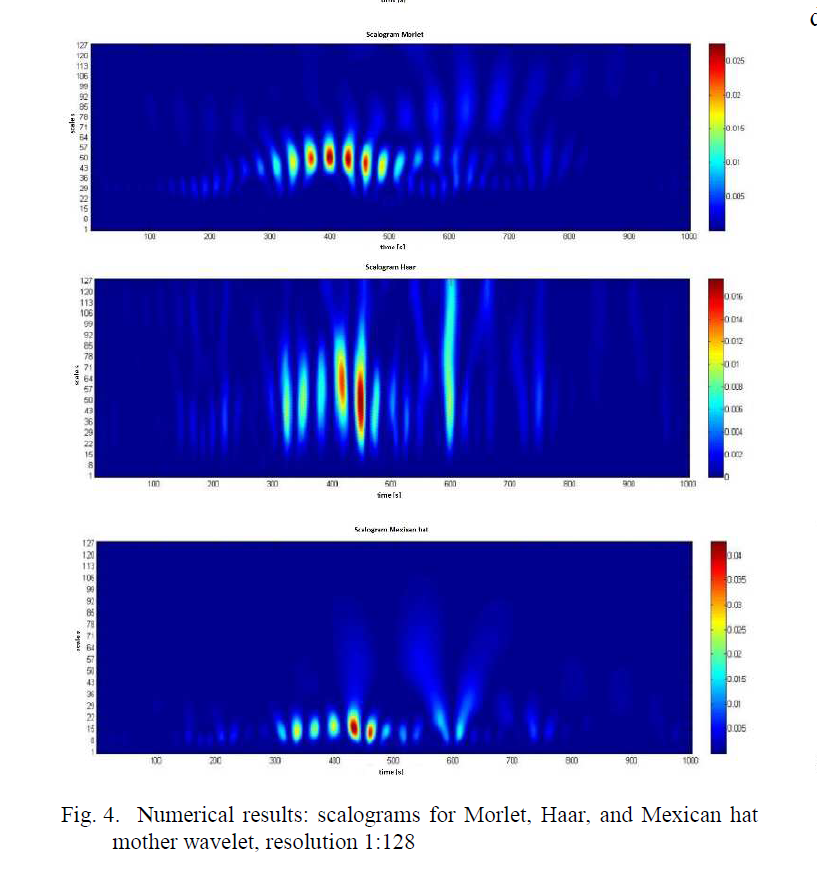

In [ ]:
Image('article_result.png')

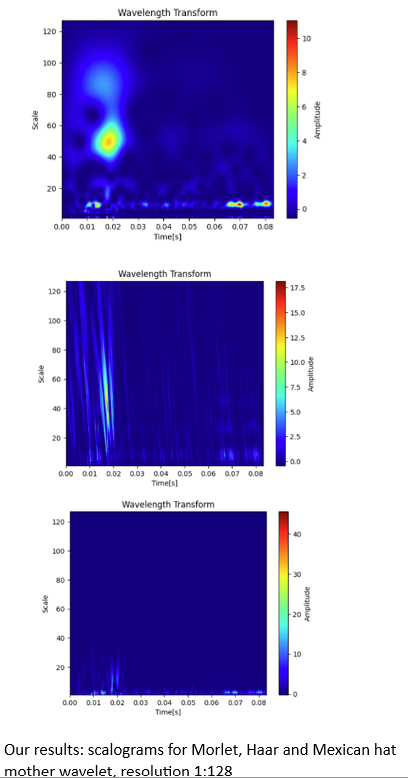

In [ ]:
Image('our_result.png')

Conclusions:

We have successfully implemented the algorithm described in the article.

However, discrepancies were observed in the results pertaining to the Mexican Hat wavelet.


While the Morlet and Haar scalograms exhibit discernible information around a scale of approximately 50, the Mexican Hat scalogram presents information at a much smaller scale (higher frequency). We can observe the same in the article's result.

In our assessment, the scalogram generated by the Mexican Hat wavelet does not adequately capture the characteristics of the cough signal, likely due to a lack of correlation.


